### Cartoon Face Alignment

As we are going to apply transfer-learning on the **FFHQ_1024 model**, we have to **resize** all images to 1024&times;1024 and **align** all 
cartoon images to have similar face-keypoint positions as the face images from the [Flickr Faces HQ dataset](https://github.com/NVlabs/ffhq-dataset) used to train the FFHQ model.

In oder to find face-keypoints, we need to begin with detecting cartoon faces.

The [dlib](http://dlib.net/) library provides two functions that can be used for cartoon face detection:

1. **HOG + Linear SVM** face detection (fast and less accurate)
2. **MMOD CNN** face detector (slow and more accurate)

We detect 68 face landmarks using the **pretrained landmarks detector** model [shape_predictor_68_face_landmarks](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2) from dlib.

In [1]:
!python align_image_data.py --help

usage: align_image_data.py [-h] [--images-source PATH] [--image-source PATH]
                           [--images-target PATH] [--output-size SIZE]
                           [--model {hog,mmod}] [--metadata]

Align face images using face-detection and face-landmarks

optional arguments:
  -h, --help            show this help message and exit
  --images-source PATH  path to source folder of face images (default: faces)
  --image-source PATH   path to a single face image (default: None)
  --images-target PATH  path to target folder for aligned face images
                        (default: faces-aligned)
  --output-size SIZE    target image size (default: 1024)
  --model {hog,mmod}    face detector model (default: mmod)
  --metadata            store metadata (faces, landmarks) (default: False)


In [2]:
!python align_image_data.py --images-source faces --images-target faces-aligned --metadata


Aligning 816 images using the 'mmod' model
100%|███████████████████████████████████████| 816/816 [1:44:01<00:00,  7.65s/it]


### Aligned Images with Landmarks

Delete Images using the `remove` button

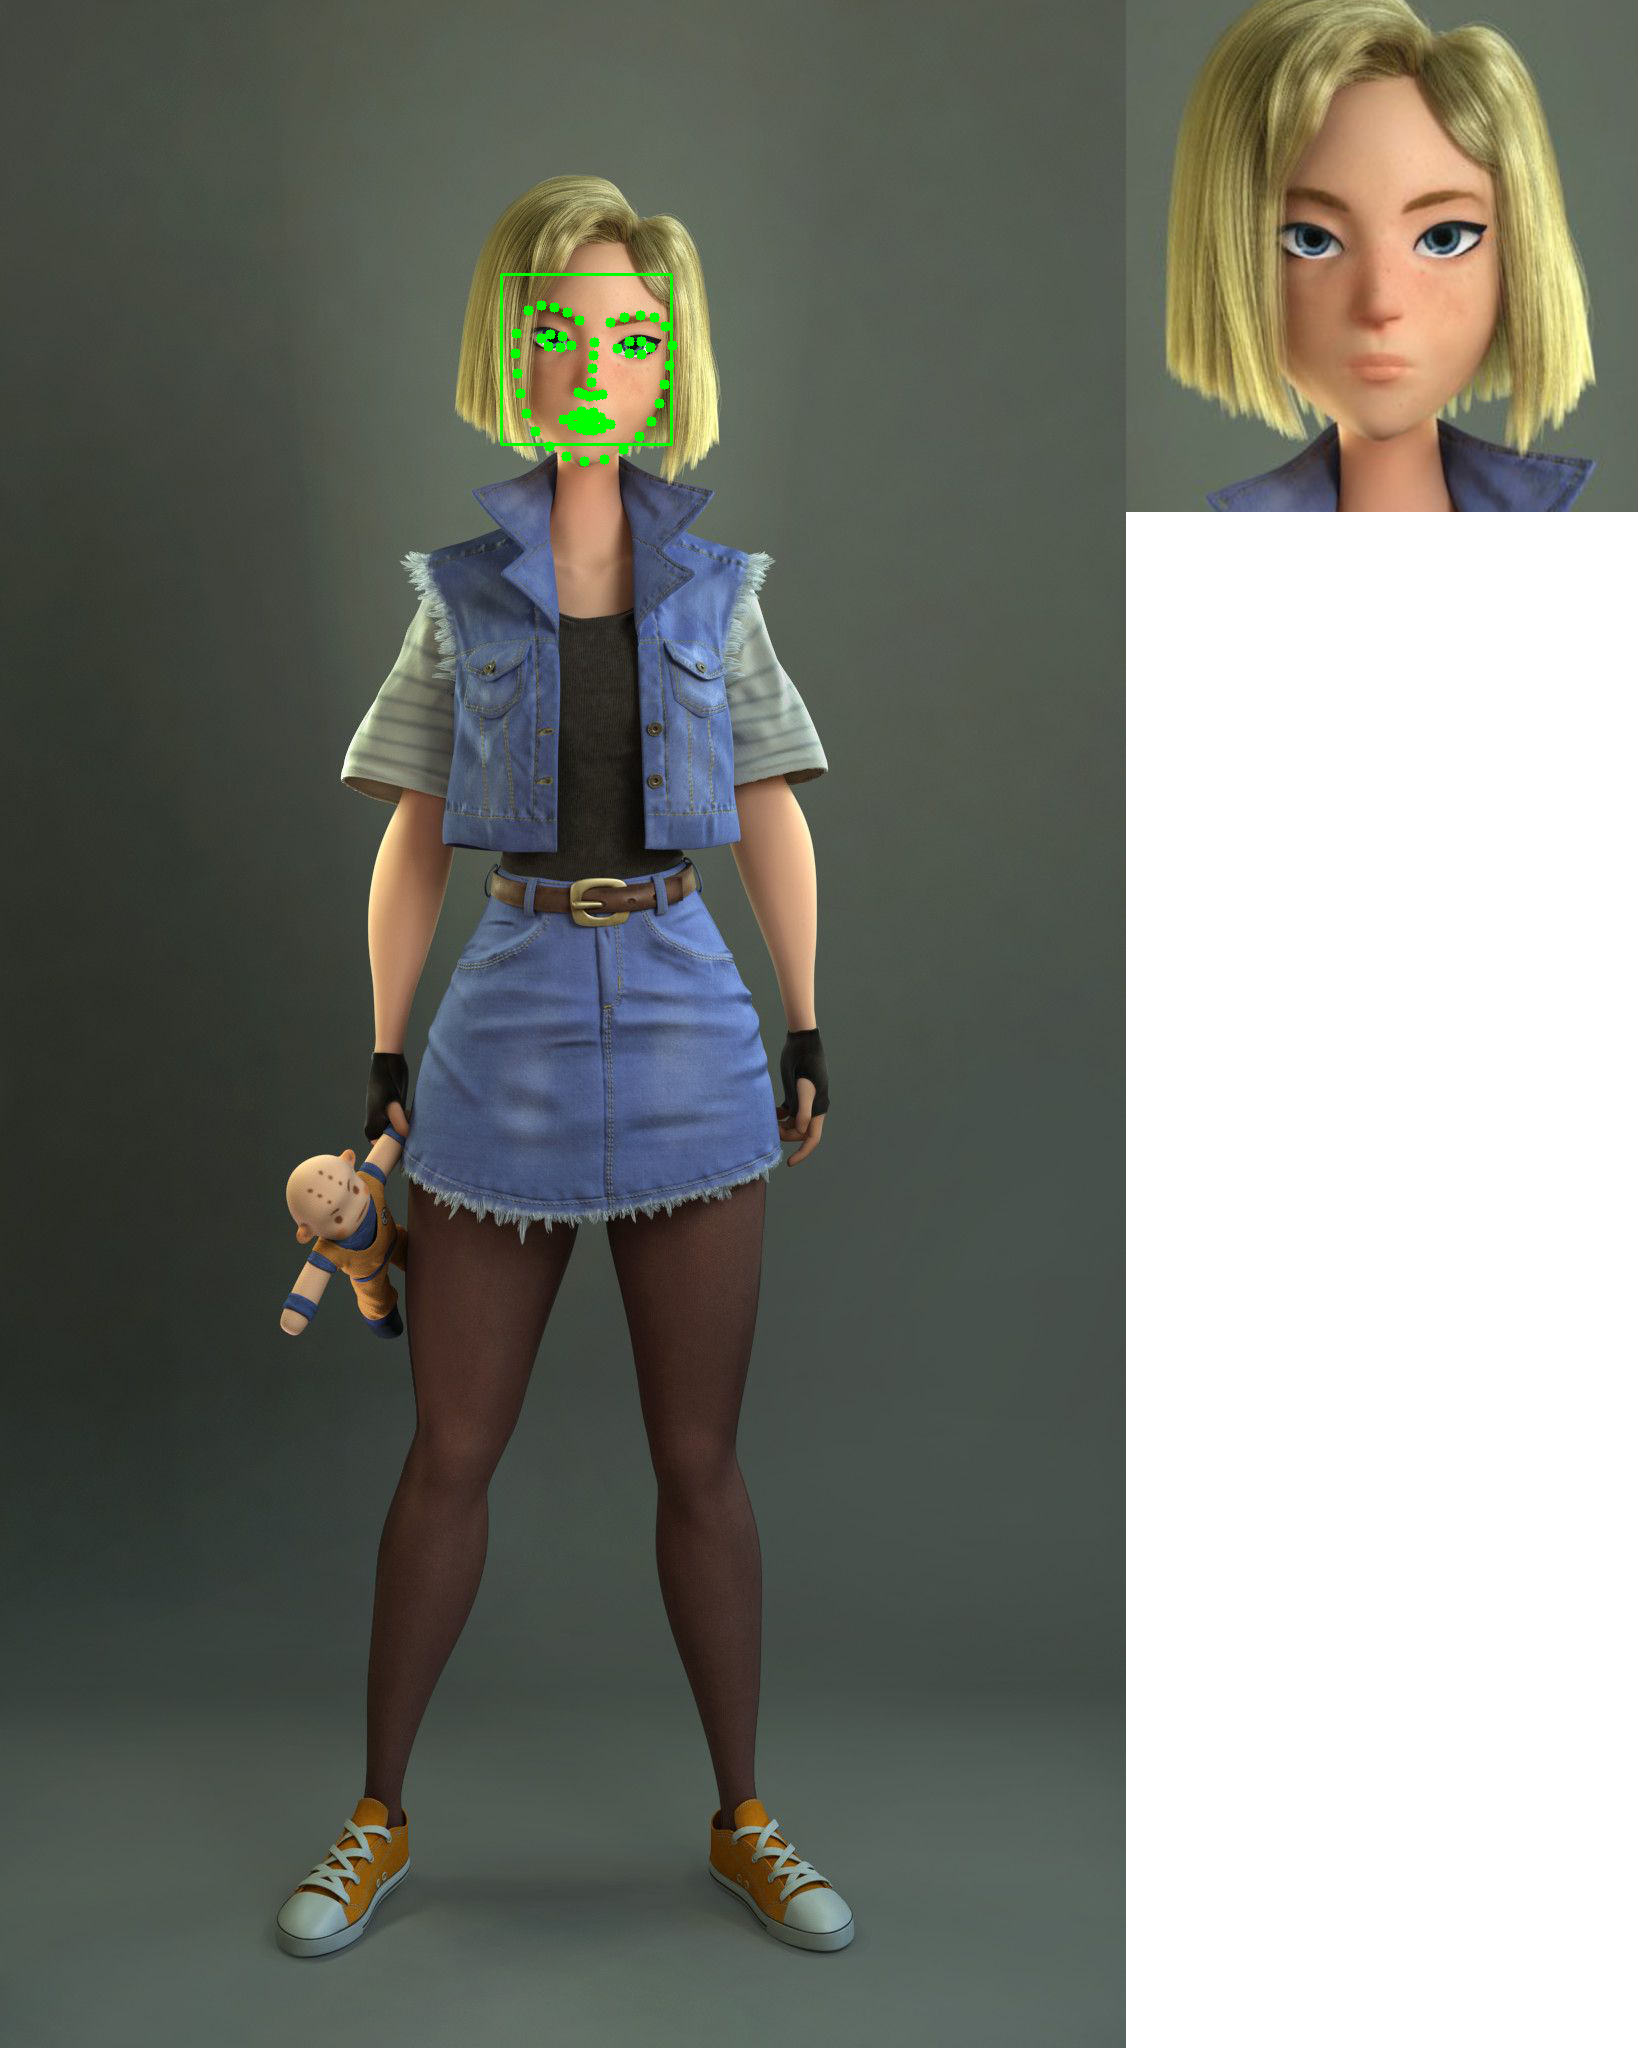

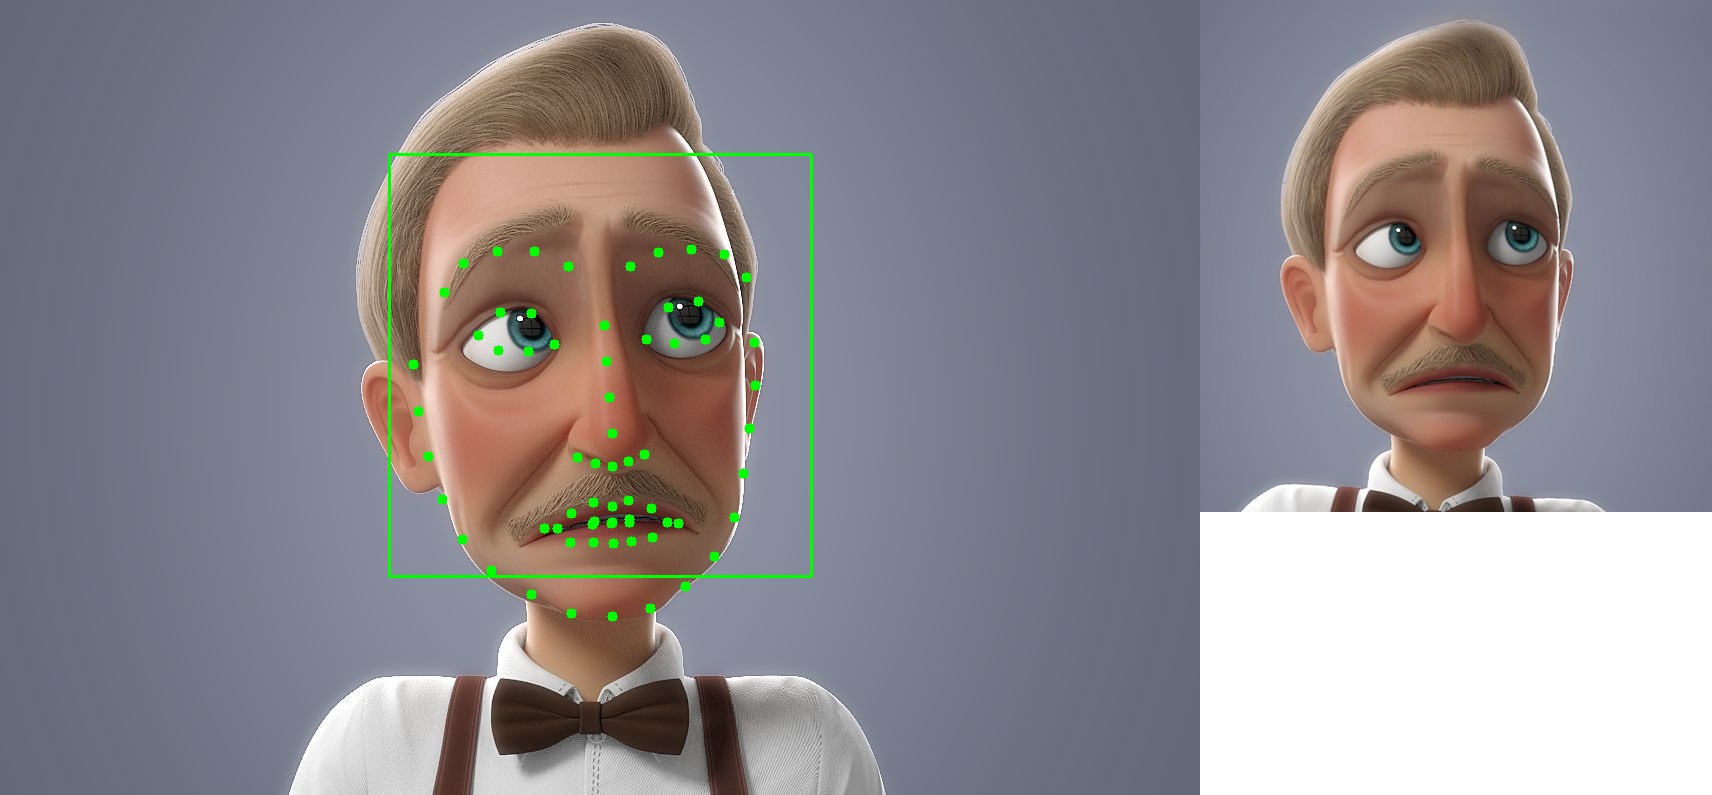

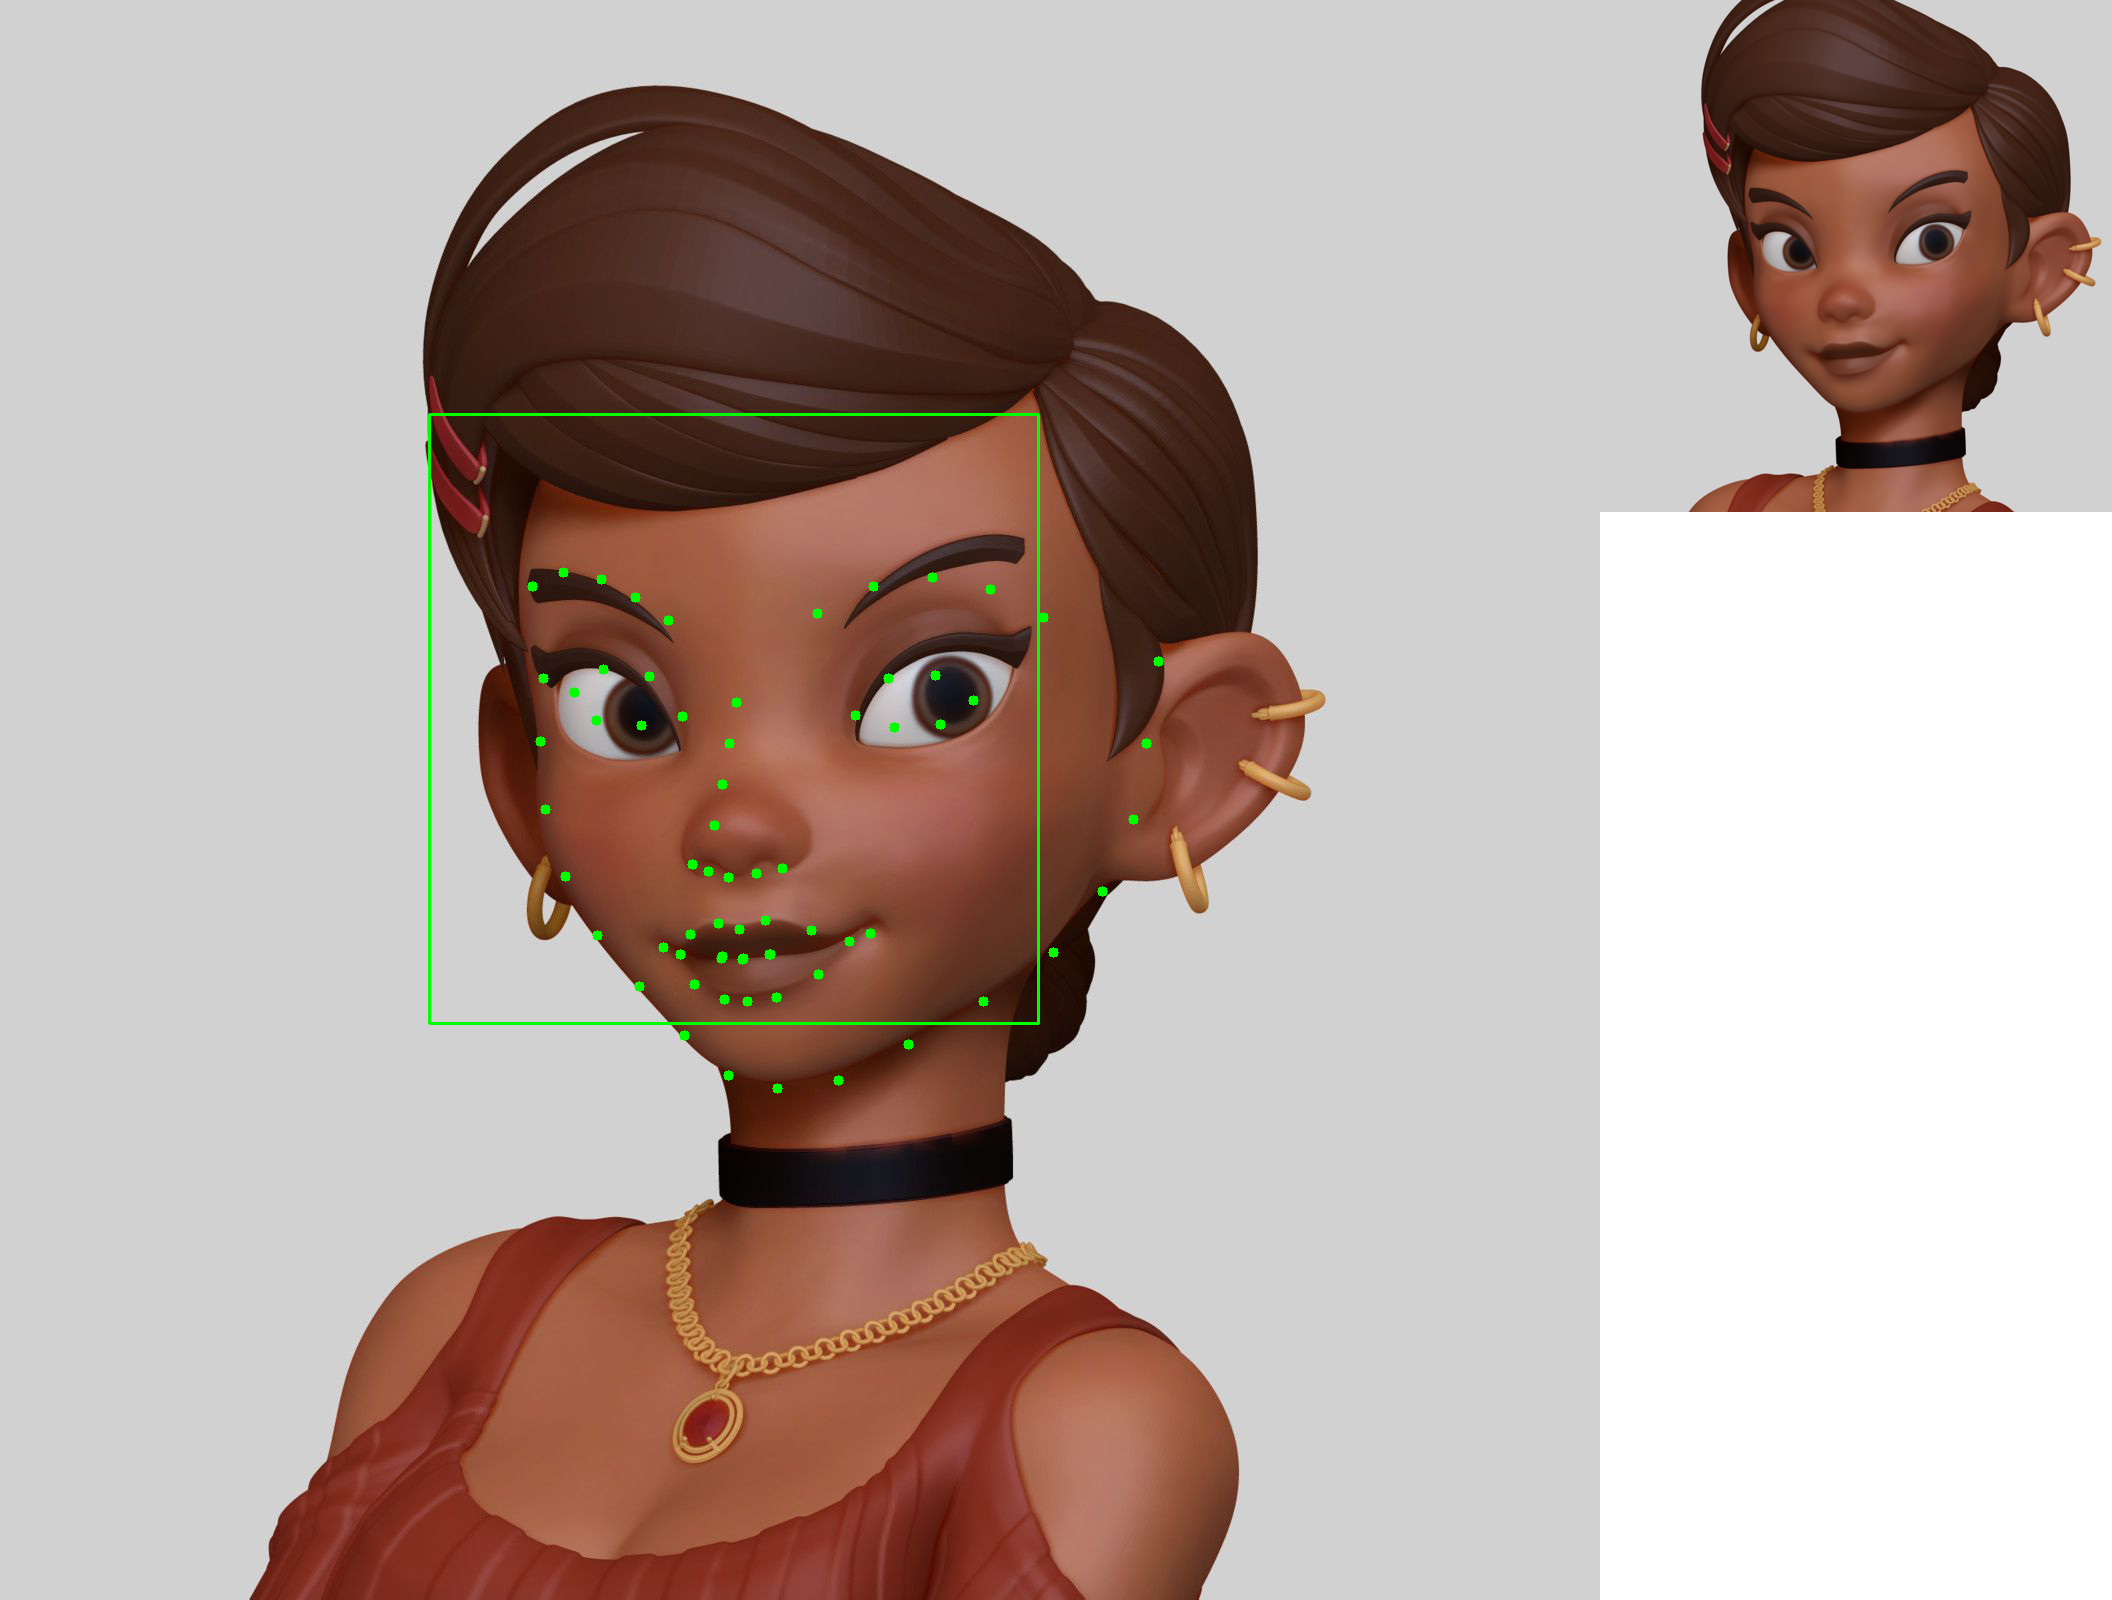

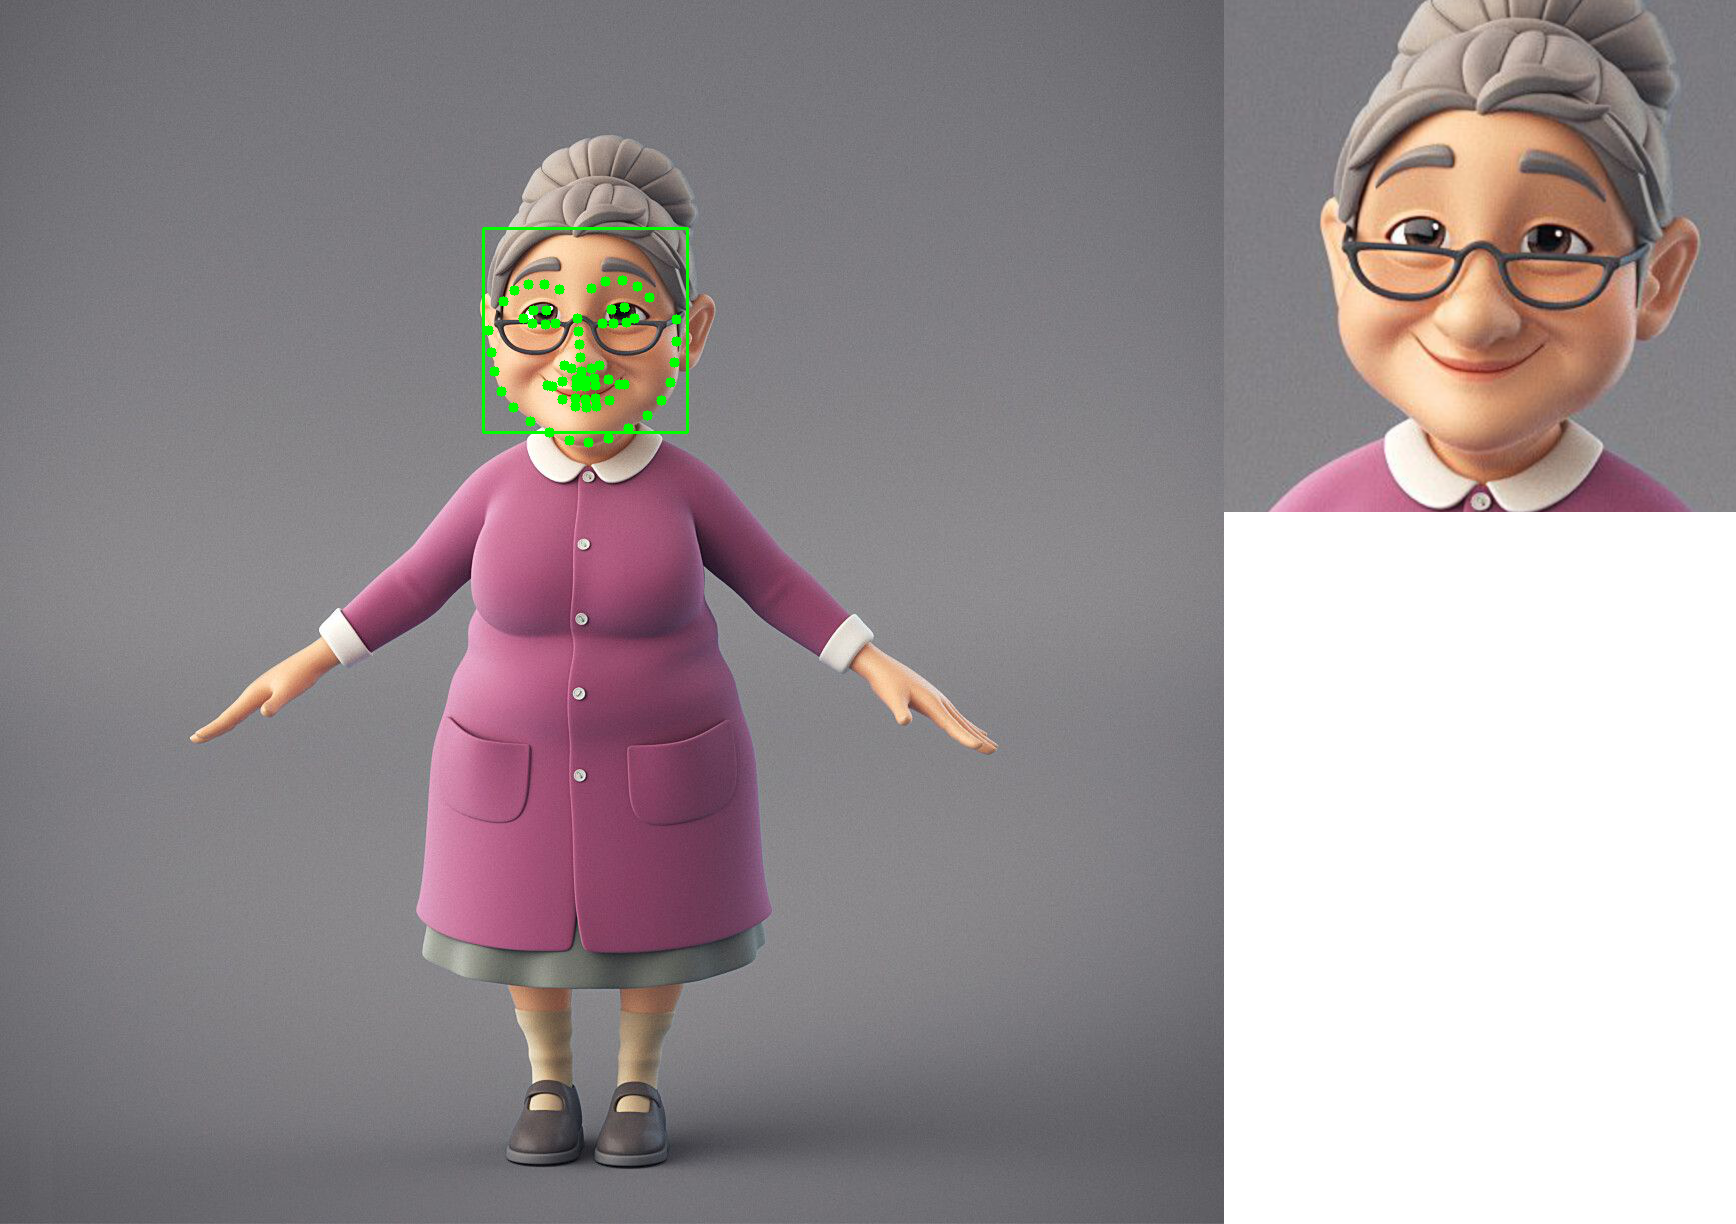

In [3]:
from utils import print_images
print_images(source_folder='faces', target_folder='faces-aligned', image_filter='aligned', landmarks=True, image_count=5)

### Images which face were not detected

In [2]:
from utils import print_images
print_images(source_folder='faces', target_folder='faces-aligned', image_filter='missed')